# Importing Libraries

In [510]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading Dataset

In [511]:
data = pd.read_csv("/content/Nairobi propertyprices - Sheet1.csv")

In [512]:
data.head(10)

,Price,propertyType,Location,Bedroom,bathroom,House size,Land size
0,KSh 350 000 000,Townhouse,Runda,4.0,4.0,NaN,0.5 acres
1,KSh 30 000 000,Vacant Land,Karen,NaN,NaN,NaN,0.5 acres
2,KSh 325 000 000,Vacant Land,Westlands,NaN,NaN,NaN,0.5 acres
3,KSh 80 000 000,Townhouse,Kitisuru,5.0,5.0,NaN,0.5 acres
4,KSh 25 500 000,Apartment,Kileleshwa,4.0,4.0,230 m²,NaN
5,KSh 300 000 000,Townhuse,Runda,6.0,6.0,NaN,0.5 acres
6,KSh 160 000 000,Townhouse,Runda,4.0,4.0,NaN,0.5 acres
7,KSh 9 500 000,Apartment,Kilimani,2.0,2.0,105 m²,NaN
8,KSh 150 000 000,Townhouse,Thigiri,4.0,4.0,NaN,0.5 acres
9,KSh 42 000 000,Apartment,Kileleshwa,4.0,4.0,280 m²,NaN


In [513]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         204 non-null    object 
 1   propertyType  204 non-null    object 
 2   Location      204 non-null    object 
 3   Bedroom       183 non-null    float64
 4   bathroom      181 non-null    float64
 5   House size    99 non-null     object 
 6   Land size     64 non-null     object 
dtypes: float64(2), object(5)
memory usage: 11.3+ KB


In [514]:
data.describe()

,Bedroom,bathroom
count,183.000000,181.000000
mean,3.513661,2.906077
std,1.585851,1.628570
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,2.000000
75%,5.000000,4.000000
max,8.000000,8.000000


In [515]:
data.shape

(204, 7)

In [516]:
data.isnull().sum()

,0
Price,0
propertyType,0
Location,0
Bedroom,21
bathroom,23
House size,105
Land size,140


In [517]:
data.propertyType.unique()

array(['Townhouse', 'Vacant Land', 'Apartment', 'Townhuse',
       'Commercial Property', 'Industrial Property'], dtype=object)

**Dropping Irrelevant Rows**

In [518]:
to_drop = ["Commercial Property", "Industrial Property", "Vacant Land"]

data = data.drop(data[data['propertyType'].isin(to_drop)].index)

In [519]:
data.propertyType.unique()

array(['Townhouse', 'Apartment', 'Townhuse'], dtype=object)

In [520]:
data.isnull().sum()

,0
Price,0
propertyType,0
Location,0
Bedroom,0
bathroom,2
House size,85
Land size,137


**Turning Price Column to Float Type**

In [521]:
data['Price'] = data['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True)

In [522]:
data['Price'] = data['Price'].astype(float)

In [523]:
data.Price

,Price
0,350000000.0
3,80000000.0
4,25500000.0
5,300000000.0
6,160000000.0
...,...
199,6000000.0
200,200000000.0
201,9500000.0
202,12500000.0


**Cleaning Column Names**

In [524]:
data.columns = ['Price', 'PropertyType', 'Location', 'Bedroom', 'Bathroom',
       'HouseSize', 'LandSize']

**Fixing typos**

In [525]:

data['PropertyType'] = data['PropertyType'].replace({'Townhuse': 'Townhouse'})

In [526]:
data['PropertyType'].unique()

array(['Townhouse', 'Apartment'], dtype=object)

**Handling Missing Values in LandsSize**

**Cleaning up HouseSize**
- Removing spaces
- Converting acres to m(squared)
- Filling nan values with the median based on Property type


In [527]:
data['HouseSize'] = data['HouseSize'].astype(str).str.replace(' ', '', regex=True)

In [528]:
print(data.HouseSize)

0        nan
3        nan
4      230m²
5        nan
6        nan
       ...  
199     60m²
200      nan
201      nan
202     96m²
203    234m²
Name: HouseSize, Length: 183, dtype: object


In [570]:
import re

def convert_units(value):
    if pd.isna(value) or value == "":
        return None

    val_str = str(value).lower()

    number_match = re.search(r'(\d+\.?\d*)', val_str.replace(',', ''))

    if not number_match:
        return None

    number = float(number_match.group(1))

    if 'acre' in val_str or re.search(r'\bac\b', val_str):
        return number * 4046.86

    return number

data['LandSize'] = data['LandSize'].apply(convert_units)
data['HouseSize'] = data['HouseSize'].apply(convert_units)

In [530]:
data['LandSize']

,LandSize
0,2023.43
3,2023.43
4,NaN
5,2023.43
6,2023.43
...,...
199,NaN
200,2023.43
201,NaN
202,NaN


In [531]:
data['HouseSize'] = data['HouseSize'].fillna(
    data.groupby('PropertyType')['HouseSize'].transform('median')
)
data['LandSize'] = data['LandSize'].fillna(
    data.groupby('PropertyType')['LandSize'].transform('median')
)

Handling Missing values in Bathroom

In [532]:
data['Bathroom'] = data['Bathroom'].fillna(
    data.groupby('PropertyType')['Bathroom'].transform('median')
)

**Moving Price to last column**

In [533]:
target = 'Price'

# 2. Create a list of all columns EXCEPT the target
features = [col for col in data.columns if col != target]

# 3. Reorganize the dataframe: [Features] + [Target]
data = data[features + [target]]

In [534]:
data.isnull().sum()

,0
PropertyType,0
Location,0
Bedroom,0
Bathroom,0
HouseSize,0
LandSize,0
Price,0


# Removing locations with lesst than 3 cases

In [535]:
data['Location'].unique()

array(['Runda', 'Kitisuru', 'Kileleshwa', 'Kilimani', 'Thigiri', 'Kyuna',
       'Nyari', 'Lavington', 'Westlands', 'Parklands', 'Riverside',
       'Muthaiga North', 'Muthaiga', 'Karen', 'Loresho', 'Kabete',
       'Thome', 'Kiambu Road', 'Ongata Rongai', 'Lower Kabete',
       'Ngong Rd', 'Nairobi West', 'Syokimau', 'Waithaka'], dtype=object)

In [536]:
data['Location'].value_counts()

,count
Location,
Kilimani,36
Lavington,32
Westlands,23
Kileleshwa,21
Runda,20
Karen,11
Kitisuru,7
Riverside,6
Nyari,5


In [537]:
location_counts = data['Location'].value_counts()

frequent_locations = location_counts[location_counts >= 3].index

data = data[data['Location'].isin(frequent_locations)]

print(f"Locations removed: {len(location_counts) - len(frequent_locations)}")
print(f"Remaining rows in dataset: {len(data)}")

Locations removed: 13
Remaining rows in dataset: 168


In [538]:
data['Location'].value_counts()

,count
Location,
Kilimani,36
Lavington,32
Westlands,23
Kileleshwa,21
Runda,20
Karen,11
Kitisuru,7
Riverside,6
Nyari,5


<Axes: xlabel='Price', ylabel='Price'>

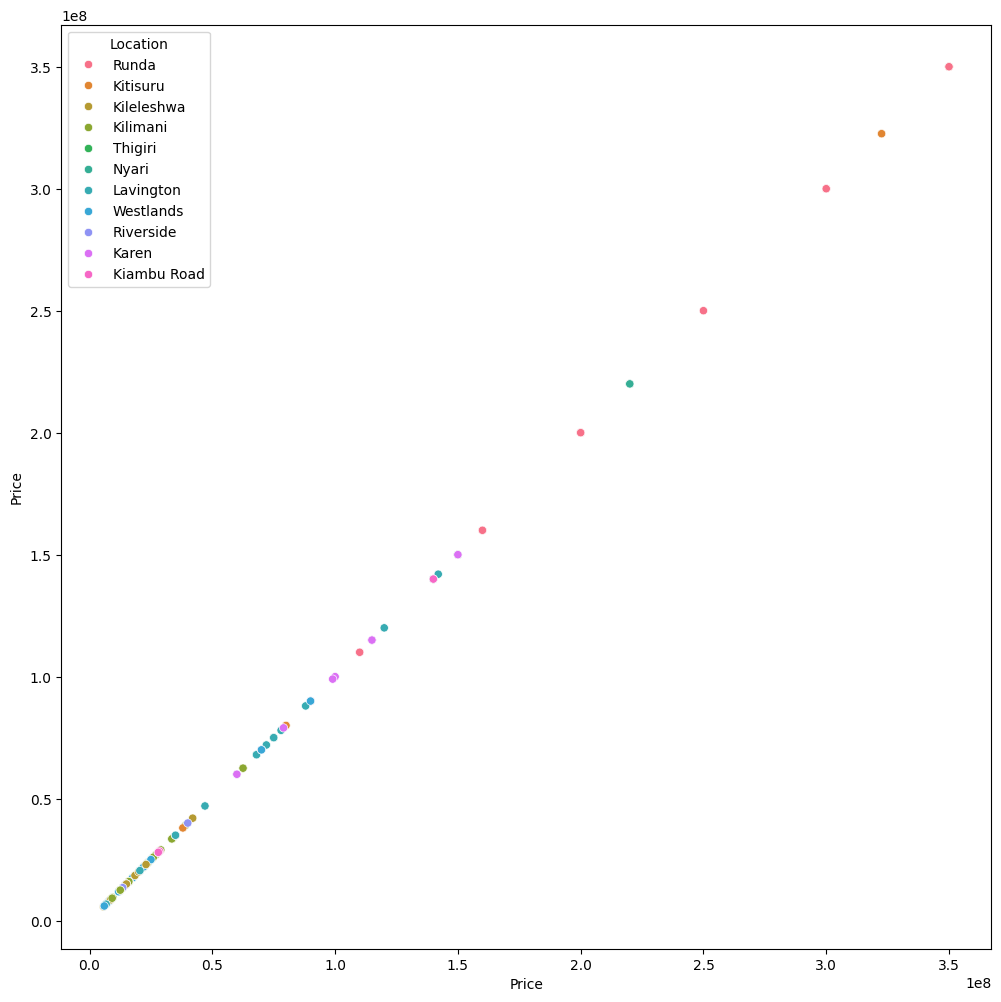

In [539]:
f, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=data, x='Price', y='Price', hue='Location')

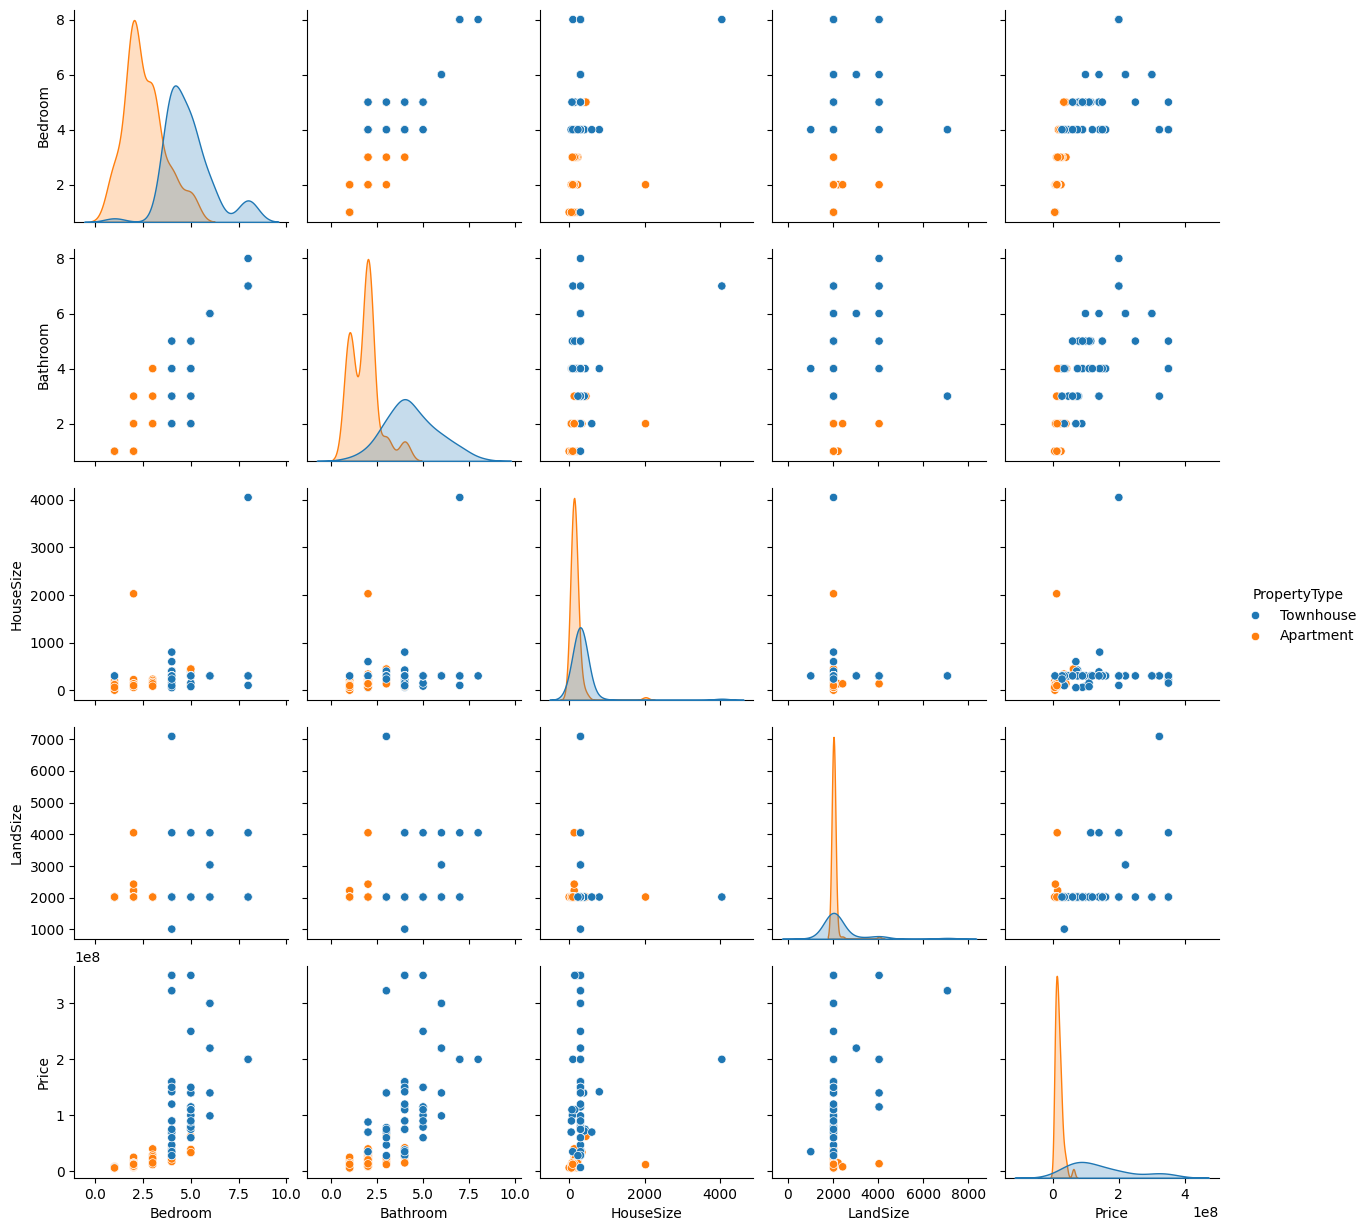

In [540]:
sns.pairplot(data, hue="PropertyType")

# Data Preprocessing

In [541]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [542]:
y_log = np.log1p(y)

In [543]:
print(X)

[['Townhouse' 'Runda' 4.0 4.0 301.0 2023.43]
 ['Townhouse' 'Kitisuru' 5.0 5.0 301.0 2023.43]
 ['Apartment' 'Kileleshwa' 4.0 4.0 230.0 2023.43]
 ...
 ['Townhouse' 'Runda' 8.0 7.0 301.0 2023.43]
 ['Apartment' 'Kilimani' 2.0 1.0 96.0 2023.43]
 ['Townhouse' 'Kiambu Road' 4.0 3.0 234.0 2023.43]]


## Spliting Dataset

In [544]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size = 0.2, random_state = 0)
y_test = np.expm1(y_test_log)

In [545]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = ColumnTransformer(transformers=[
    ('num', StandardScaler(with_mean=True), [2, 3, 4, 5]),
    ('cat', OneHotEncoder(handle_unknown='ignore'), [0, 1])
], remainder='passthrough')

X_train = ct.fit_transform(X_train)

X_test = ct.transform(X_test)

# Linear Regression

In [546]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train_log)

LinearRegression()

In [547]:
y_pred = np.expm1(regressor.predict(X_test))
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3.36e+07 2.85e+07]
 [2.23e+07 2.40e+07]
 [1.27e+07 2.50e+07]
 [9.25e+06 5.70e+06]
 [1.71e+07 1.60e+07]
 [3.44e+07 3.35e+07]
 [2.10e+07 4.20e+07]
 [1.25e+07 9.50e+06]
 [1.33e+07 1.60e+07]
 [9.09e+06 7.85e+06]
 [1.75e+07 2.25e+07]
 [8.43e+07 7.50e+07]
 [1.51e+07 1.50e+07]
 [1.71e+07 4.00e+07]
 [1.21e+07 8.50e+06]
 [1.55e+08 1.50e+08]
 [7.67e+07 9.00e+07]
 [2.11e+08 3.00e+08]
 [1.39e+07 1.50e+07]
 [1.04e+08 8.00e+07]
 [1.32e+08 9.90e+07]
 [1.75e+07 2.60e+07]
 [6.80e+07 3.50e+07]
 [1.33e+07 1.25e+07]
 [1.33e+07 1.60e+07]
 [9.99e+07 1.50e+08]
 [8.94e+07 1.40e+08]
 [1.25e+07 1.20e+07]
 [9.07e+06 6.75e+06]
 [9.10e+06 8.00e+06]
 [1.76e+08 1.15e+08]
 [3.48e+07 3.35e+07]
 [8.46e+07 7.00e+07]
 [6.35e+07 6.80e+07]]


In [548]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8288405407671017

# Polynomial Regression

In [549]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y_train_log)

LinearRegression()

In [550]:
y_pred_poly = np.expm1(regressor_poly.predict(poly_reg.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_poly.reshape(len(y_pred_poly),1), y_test.reshape(len(y_test),1)),1))

[[2.80e+07 2.85e+07]
 [1.94e+07 2.40e+07]
 [1.24e+07 2.50e+07]
 [5.91e+06 5.70e+06]
 [1.68e+07 1.60e+07]
 [4.27e+07 3.35e+07]
 [2.83e+07 4.20e+07]
 [9.07e+06 9.50e+06]
 [1.27e+07 1.60e+07]
 [7.52e+06 7.85e+06]
 [2.38e+07 2.25e+07]
 [9.06e+07 7.50e+07]
 [1.10e+07 1.50e+07]
 [2.09e+07 4.00e+07]
 [1.12e+07 8.50e+06]
 [1.50e+08 1.50e+08]
 [8.50e+07 9.00e+07]
 [3.53e+08 3.00e+08]
 [1.45e+07 1.50e+07]
 [1.67e+08 8.00e+07]
 [1.06e+08 9.90e+07]
 [1.90e+07 2.60e+07]
 [7.08e+07 3.50e+07]
 [1.14e+07 1.25e+07]
 [1.27e+07 1.60e+07]
 [1.02e+08 1.50e+08]
 [1.03e+08 1.40e+08]
 [1.02e+07 1.20e+07]
 [7.46e+06 6.75e+06]
 [7.58e+06 8.00e+06]
 [5.80e+07 1.15e+08]
 [2.87e+07 3.35e+07]
 [3.99e+07 7.00e+07]
 [7.20e+07 6.80e+07]]


In [551]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_poly)

0.8324388603272149

# SVR

In [552]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()


In [553]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', C=1e6)
regressor_svr.fit(X_train, y_train_log)


SVR(C=1000000.0)

In [554]:
y_pred_svr = np.expm1(regressor_svr.predict(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1))

[[2.93e+07 2.85e+07]
 [2.79e+07 2.40e+07]
 [1.80e+07 2.50e+07]
 [6.50e+06 5.70e+06]
 [1.75e+07 1.60e+07]
 [3.64e+07 3.35e+07]
 [2.02e+07 4.20e+07]
 [8.78e+06 9.50e+06]
 [1.62e+07 1.60e+07]
 [6.30e+06 7.85e+06]
 [2.36e+07 2.25e+07]
 [6.66e+07 7.50e+07]
 [2.13e+07 1.50e+07]
 [2.28e+07 4.00e+07]
 [9.16e+06 8.50e+06]
 [1.61e+08 1.50e+08]
 [8.06e+06 9.00e+07]
 [2.73e+08 3.00e+08]
 [1.55e+07 1.50e+07]
 [8.86e+07 8.00e+07]
 [1.26e+08 9.90e+07]
 [2.65e+07 2.60e+07]
 [1.46e+07 3.50e+07]
 [1.12e+07 1.25e+07]
 [1.62e+07 1.60e+07]
 [1.04e+08 1.50e+08]
 [7.35e+09 1.40e+08]
 [9.84e+06 1.20e+07]
 [6.67e+06 6.75e+06]
 [6.00e+06 8.00e+06]
 [1.10e+08 1.15e+08]
 [3.10e+07 3.35e+07]
 [2.28e+10 7.00e+07]
 [7.44e+07 6.80e+07]]


In [555]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_svr)

-4579.782724482755

# Decision Tree

In [556]:
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor(random_state = 0)
regressor_tree.fit(X_train, y_train_log)

DecisionTreeRegressor(random_state=0)

In [557]:
y_pred_tree = np.expm1(regressor_tree.predict(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_tree.reshape(len(y_pred_tree),1), y_test.reshape(len(y_test),1)),1))

[[2.80e+07 2.85e+07]
 [1.75e+07 2.40e+07]
 [1.83e+07 2.50e+07]
 [6.50e+06 5.70e+06]
 [1.72e+07 1.60e+07]
 [3.35e+07 3.35e+07]
 [2.55e+07 4.20e+07]
 [9.25e+06 9.50e+06]
 [1.60e+07 1.60e+07]
 [6.00e+06 7.85e+06]
 [2.25e+07 2.25e+07]
 [7.50e+07 7.50e+07]
 [1.50e+07 1.50e+07]
 [1.71e+07 4.00e+07]
 [8.50e+06 8.50e+06]
 [1.50e+08 1.50e+08]
 [7.00e+07 9.00e+07]
 [3.00e+08 3.00e+08]
 [9.00e+06 1.50e+07]
 [1.67e+08 8.00e+07]
 [1.01e+08 9.90e+07]
 [2.90e+07 2.60e+07]
 [5.94e+07 3.50e+07]
 [1.25e+07 1.25e+07]
 [1.60e+07 1.60e+07]
 [1.01e+08 1.50e+08]
 [1.40e+08 1.40e+08]
 [9.20e+06 1.20e+07]
 [7.89e+06 6.75e+06]
 [6.00e+06 8.00e+06]
 [1.15e+08 1.15e+08]
 [3.90e+07 3.35e+07]
 [7.20e+07 7.00e+07]
 [6.80e+07 6.80e+07]]


In [558]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_tree)

0.903799365038491

# Random Forest

In [559]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators = 100, min_samples_split = 5, random_state = 0)
regressor_forest.fit(X_train, y_train_log)

RandomForestRegressor(min_samples_split=5, random_state=0)

In [560]:
y_pred_forest = np.expm1(regressor_forest.predict(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_forest.reshape(len(y_pred_forest),1), y_test.reshape(len(y_test),1)),1))

[[3.93e+07 2.85e+07]
 [2.13e+07 2.40e+07]
 [1.71e+07 2.50e+07]
 [7.15e+06 5.70e+06]
 [1.65e+07 1.60e+07]
 [4.02e+07 3.35e+07]
 [2.66e+07 4.20e+07]
 [9.28e+06 9.50e+06]
 [1.40e+07 1.60e+07]
 [7.00e+06 7.85e+06]
 [2.39e+07 2.25e+07]
 [8.42e+07 7.50e+07]
 [1.60e+07 1.50e+07]
 [1.79e+07 4.00e+07]
 [1.22e+07 8.50e+06]
 [1.18e+08 1.50e+08]
 [6.16e+07 9.00e+07]
 [2.78e+08 3.00e+08]
 [1.27e+07 1.50e+07]
 [1.36e+08 8.00e+07]
 [1.26e+08 9.90e+07]
 [2.32e+07 2.60e+07]
 [6.05e+07 3.50e+07]
 [1.21e+07 1.25e+07]
 [1.40e+07 1.60e+07]
 [1.02e+08 1.50e+08]
 [9.16e+07 1.40e+08]
 [9.57e+06 1.20e+07]
 [8.13e+06 6.75e+06]
 [6.65e+06 8.00e+06]
 [1.71e+08 1.15e+08]
 [3.38e+07 3.35e+07]
 [6.49e+07 7.00e+07]
 [6.70e+07 6.80e+07]]


In [561]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_forest)

0.8735449321632569

# Model Evaluation

In [562]:
from sklearn.metrics import r2_score, mean_absolute_error

results_data = {
    "Model": ["Linear Regression", "Polynomial Regression", "SVR", "Decision Tree", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_svr),
        r2_score(y_test, y_pred_tree),
        r2_score(y_test, y_pred_forest)
    ],
    "MAE (KES)": [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, y_pred_svr),
        mean_absolute_error(y_test, y_pred_tree),
        mean_absolute_error(y_test, y_pred_forest)
    ]
}

leaderboard = pd.DataFrame(results_data)

leaderboard = leaderboard.sort_values(by="R2 Score", ascending=False)

print("--- NAIROBI REAL ESTATE MODEL RANKINGS ---")
print(leaderboard.to_string(index=False))

--- NAIROBI REAL ESTATE MODEL RANKINGS ---
                Model     R2 Score    MAE (KES)
        Decision Tree     0.903799 7.713915e+06
        Random Forest     0.873545 1.318505e+07
Polynomial Regression     0.832439 1.389326e+07
    Linear Regression     0.828841 1.440119e+07
                  SVR -4579.782724 8.905805e+08


Decision Tree is our best perfoming model

In [563]:
mape = np.mean(np.abs((y_test - y_pred_forest) / y_test)) * 100
print(f"The model is off by an average of: {mape:.2f}%")

The model is off by an average of: 22.66%


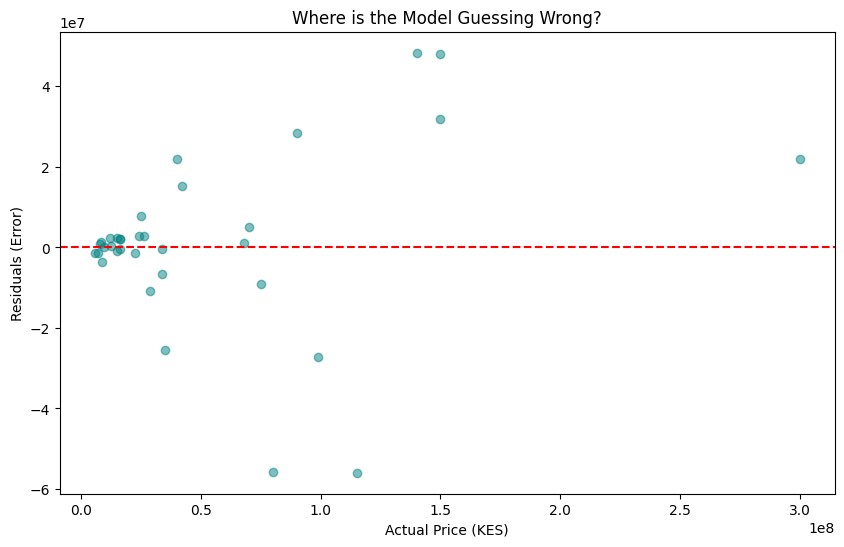

In [564]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_forest
plt.scatter(y_test, residuals, alpha=0.5, color='teal')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Price (KES)')
plt.ylabel('Residuals (Error)')
plt.title('Where is the Model Guessing Wrong?')
plt.show()

# Figuring Price Drivers

/tmp/ipython-input-525829825.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')


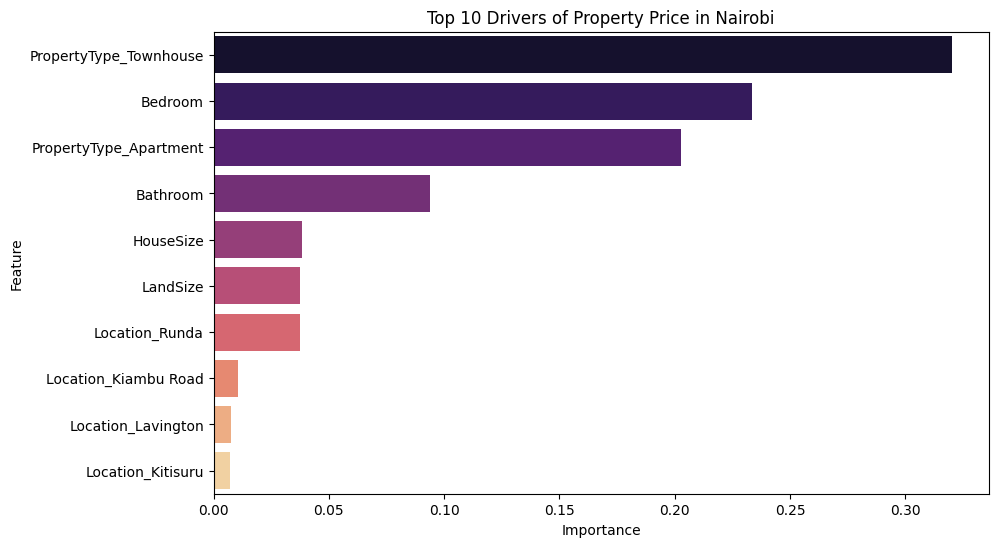

In [565]:
cat_features = ct.named_transformers_['cat'].get_feature_names_out(['PropertyType', 'Location'])
num_features = ['Bedroom', 'Bathroom', 'HouseSize', 'LandSize']
all_feature_names = np.concatenate([num_features, cat_features])

importances = regressor_forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')
plt.title('Top 10 Drivers of Property Price in Nairobi')
plt.show()

# PREDICTOR

In [567]:
def predict_my_house(prop_type, location, bed, bath, house_sqm, land_sqm):
    sample = pd.DataFrame([[prop_type, location, bed, bath, house_sqm, land_sqm]],
                          columns=['PropertyType', 'Location', 'Bedroom', 'Bathroom', 'HouseSize', 'LandSize'])

    sample_transformed = ct.transform(sample)

    prediction_log = regressor_forest.predict(sample_transformed)
    prediction_kes = np.expm1(prediction_log)

    return f"Estimated Price: KES {prediction_kes[0]:,.2f}"

print(predict_my_house('Apartment', 'Kilimani', 3, 2, 150, 0))

Estimated Price: KES 24,922,889.26


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


# Distribution of Prediction errors

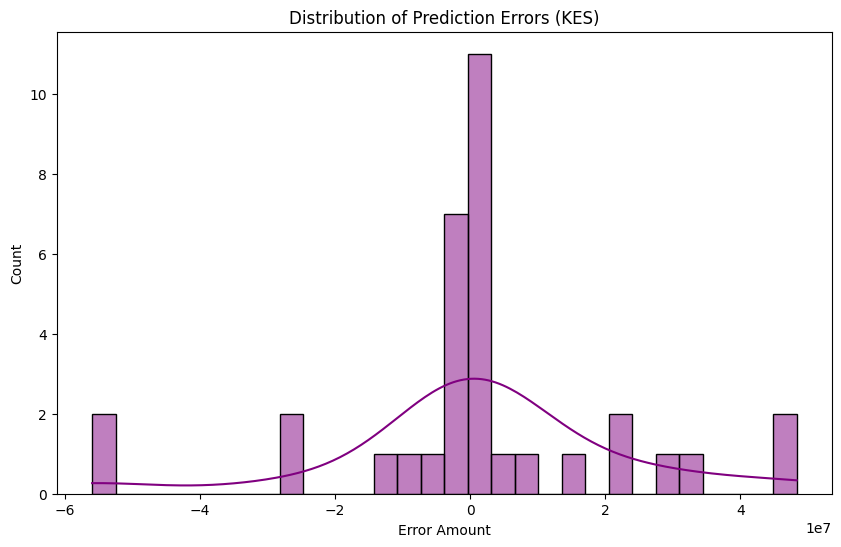

In [568]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Prediction Errors (KES)')
plt.xlabel('Error Amount')
plt.show()

# Cross value Score

In [569]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor_forest, X_train, y_train_log, cv=5, scoring='r2')
print(f"Average Cross-Validation R2: {cv_scores.mean():.2f}")

Average Cross-Validation R2: 0.86
